In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
from google_geocoding import API_KEY
%matplotlib inline

In [2]:
dir = "C:\\Users\\stefy\\OneDrive - University of Waterloo\\Work Term Report 3 - Parking\\Datasets\\Toronto\\"

df0 = pd.read_csv(dir+'Parking_Tags_Data_2019.000.csv')
df1 = pd.read_csv(dir+'Parking_Tags_Data_2019.001.csv')
df2 = pd.read_csv(dir+'Parking_Tags_Data_2019.002.csv')
df3 = pd.read_csv(dir+'Parking_Tags_Data_2019.003.csv')
df4 = pd.read_csv(dir+'Parking_Tags_Data_2019.004.csv')
df5 = pd.read_csv(dir+'Parking_Tags_Data_2019.005.csv')
df6 = pd.read_csv(dir+'Parking_Tags_Data_2019.006.csv')
df7 = pd.read_csv(dir+'Parking_Tags_Data_2019.007.csv')
df8 = pd.read_csv(dir+'Parking_Tags_Data_2019.008.csv')

In [3]:
df = pd.concat([df0,df1,df2,df3,df4,df5,df6,df7,df8], axis=0, ignore_index=True)

In [4]:
df.head()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***29025,20190101,3,PARK ON PRIVATE PROPERTY,30,0.0,AT,2110 KEELE ST,NaN,NaN,ON
1,***32896,20190101,3,PARK ON PRIVATE PROPERTY,30,1.0,AT,125 QUEENS WHARF RD,NaN,NaN,ON
2,***41781,20190101,29,PARK PROHIBITED TIME NO PERMIT,30,1.0,S/O,HAZELWOOD AVE,W/O,JONES AVE,ON
3,***03706,20190101,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,2.0,NR,10 CARABOB CRT,NaN,NaN,ON
4,***69805,20190101,14,PARK-OBSTRUCT (DRWAY/LANEWAY),50,3.0,R/O,1801 EGLINTON AVE W,NaN,NaN,ON


In [5]:
df.shape

(2213939, 11)

In [6]:
df['set_fine_amount'].sum()

108424170

In [7]:
df = df[df['time_of_infraction'].isna()==False]

In [8]:
df['year'] = df['date_of_infraction'].apply(lambda x: int(str(x)[0:4]))
df['month'] = df['date_of_infraction'].apply(lambda x: int(str(x)[4:6]))
df['day'] = df['date_of_infraction'].apply(lambda x: int(str(x)[6:8]))

In [9]:
unique_codes = df['infraction_code'].unique()
descriptions=[]
for code in unique_codes:
    descriptions.append(df[df['infraction_code']==code]['infraction_description'].iloc[0])

In [10]:
codes_descriptions = pd.DataFrame(unique_codes, columns=["codes"])
codes_descriptions['descriptions']=descriptions
codes_descriptions

,codes,descriptions
0,3,PARK ON PRIVATE PROPERTY
1,29,PARK PROHIBITED TIME NO PERMIT
2,5,PARK-SIGNED HWY-PROHIBIT DY/TM
3,14,PARK-OBSTRUCT (DRWAY/LANEWAY)
4,9,STOP-SIGNED HWY-PROHIBIT TM/DY
...,...,...
171,41,PARALLEL PARK-METERED SPACE-RE
172,266,PARK VEHICLE PROHIBITED TIME
173,261,PARK MTR REC VE NOT DESIG AREA
174,411,PARK UNAUTH. VEH IN E-VEH. STN


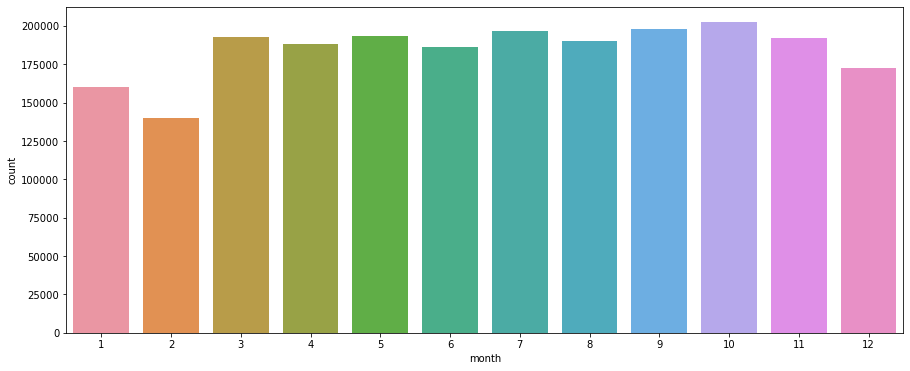

In [11]:
plt.figure(figsize=(15,6))
sns.countplot(x='month', data=df)
plt.show()

In [12]:
def get_hour(x):
    x= int(x)
    x = str(int(x))
    hour=0
    min=0
    if len(x)==1:
        min=x
    if len(x)==2:
        min=x
    if len(x)==3:
        hour=x[0]
        min = x[1:]
    if len(x)==4:
        hour=x[0:2]
        min=x[2:]
    if int(min)>60 or int(hour)>24:
     
        hour=-1
    return int(hour) 

get_hour(79)

-1

In [13]:
def get_minute(x):
    x= int(x)
    x = str(int(x))
    hour=0
    min=0
    if len(x)==1:
        min=x
    if len(x)==2:
        min=x
    if len(x)==3:
        hour=x[0]
        min = x[1:]
    if len(x)==4:
        hour=x[0:2]
        min=x[2:]
    if int(min)>60 or int(hour)>24:
   
        min=-1
    return int(min) 
get_minute(352)

52

In [14]:
df['minute']=df['time_of_infraction'].apply(get_minute)
df['hour']=df['time_of_infraction'].apply(get_hour)
df = df[df['hour']!=-1]
df['formatted_date'] = pd.to_datetime(df[['year','month','day']])

In [15]:
df['day_of_week'] = df['formatted_date'].dt.dayofweek
df['day_name'] = df['formatted_date'].dt.day_name()

In [16]:
df['hour'].min(), df['hour'].max()
df['count']=1

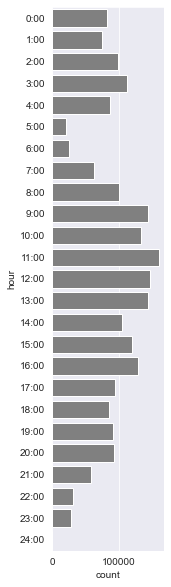

In [44]:
fig, ax = plt.subplots(figsize=(2, 10)) 
sns.countplot(y='hour', data=df, color='grey')
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.2f}'.format(x) + ':00'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(x) + ':00'))
plt.show()

In [17]:
corr_matrix = df.corr()
corr_matrix

,date_of_infraction,infraction_code,set_fine_amount,time_of_infraction,year,month,day,minute,hour,day_of_week,count
date_of_infraction,1.000000,-0.012272,0.030195,-0.002897,NaN,0.999661,0.041852,0.000841,-0.002920,0.003516,NaN
infraction_code,-0.012272,1.000000,0.344263,0.206189,NaN,-0.011441,-0.032265,-0.011715,0.206507,-0.015877,NaN
set_fine_amount,0.030195,0.344263,1.000000,0.146729,NaN,0.030110,0.004131,-0.012488,0.147073,-0.023616,NaN
time_of_infraction,-0.002897,0.206189,0.146729,1.000000,NaN,-0.002823,-0.002919,0.011836,0.999600,-0.028901,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.999661,-0.011441,0.030110,-0.002823,NaN,1.000000,0.015832,0.000823,-0.002846,0.003394,NaN
day,0.041852,-0.032265,0.004131,-0.002919,NaN,0.015832,1.000000,0.000722,-0.002939,0.004763,NaN
minute,0.000841,-0.011715,-0.012488,0.011836,NaN,0.000823,0.000722,1.000000,-0.016465,-0.002476,NaN
hour,-0.002920,0.206507,0.147073,0.999600,NaN,-0.002846,-0.002939,-0.016465,1.000000,-0.028829,NaN
day_of_week,0.003516,-0.015877,-0.023616,-0.028901,NaN,0.003394,0.004763,-0.002476,-0.028829,1.000000,NaN


In [18]:
df.head(3)

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,year,month,day,minute,hour,formatted_date,day_of_week,day_name,count
0,***29025,20190101,3,PARK ON PRIVATE PROPERTY,30,0.0,AT,2110 KEELE ST,NaN,NaN,ON,2019,1,1,0,0,2019-01-01,1,Tuesday,1
1,***32896,20190101,3,PARK ON PRIVATE PROPERTY,30,1.0,AT,125 QUEENS WHARF RD,NaN,NaN,ON,2019,1,1,1,0,2019-01-01,1,Tuesday,1
2,***41781,20190101,29,PARK PROHIBITED TIME NO PERMIT,30,1.0,S/O,HAZELWOOD AVE,W/O,JONES AVE,ON,2019,1,1,1,0,2019-01-01,1,Tuesday,1


In [109]:
weather_dir = 'C:\\Users\\stefy\\OneDrive - University of Waterloo\\Work Term Report 3 - Parking\\Datasets\\Toronto\\Weather\\'

weather = pd.read_excel(weather_dir+'weather_2019.xlsx')
weather['formatted_date'] = pd.to_datetime(weather['date'])
# weather = weather.drop()
# weather['formatted_date'].dt.day_name()

In [110]:
tickets_and_weather = pd.merge(left=df.groupby('formatted_date', as_index=False).sum(), right=weather.drop(['date','month','day'],axis=1),left_on='formatted_date', right_on='formatted_date')
tickets_and_weather

,formatted_date,date_of_infraction,infraction_code,set_fine_amount,time_of_infraction,year,month,day,minute,hour,...,count,maxtempC,mintempC,avgtempC,totalSnow_cm,windspeedKmph,precipMM,FeelsLikeC,Holiday,Holiday_name
0,2019-01-01,38280431496,224031,85365,1639560.0,3828024,1896,1896,53560,15860,...,1896,2,-4,-1,0.0,17,0.3,-5,500.0,New Year's Day
1,2019-01-02,124148937198,794387,307895,7005142.0,12414831,6149,12298,181042,68241,...,6149,-1,-8,-3,0.8,9,1.0,-7,NaN,NaN
2,2019-01-03,117425639048,753590,293295,7097761.0,11742504,5816,17448,169761,69280,...,5816,2,0,1,0.9,18,1.0,-5,NaN,NaN
3,2019-01-04,137918600424,745744,333190,8242645.0,13791789,6831,27324,199145,80435,...,6831,6,2,4,0.0,18,0.0,0,NaN,NaN
4,2019-01-05,113609720835,635055,246975,6436491.0,11360913,5627,28135,163291,62732,...,5627,5,2,3,0.0,11,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,123792412737,659556,335670,7134128.0,12378489,73572,165537,177128,69570,...,6131,7,3,6,0.0,12,0.9,3,NaN,NaN
361,2019-12-28,98674531236,443700,234350,5351409.0,9866853,58644,136836,142909,52085,...,4887,4,2,3,0.0,5,0.0,1,NaN,NaN
362,2019-12-29,74445061323,280473,170450,3669265.0,7444053,44244,106923,105865,35634,...,3687,3,2,3,0.0,17,6.0,-2,NaN,NaN
363,2019-12-30,125508685680,692350,359820,7519456.0,12550104,74592,186480,179256,73402,...,6216,7,3,5,0.0,25,5.7,-1,NaN,NaN


In [111]:
tickets_and_weather

,formatted_date,date_of_infraction,infraction_code,set_fine_amount,time_of_infraction,year,month,day,minute,hour,...,count,maxtempC,mintempC,avgtempC,totalSnow_cm,windspeedKmph,precipMM,FeelsLikeC,Holiday,Holiday_name
0,2019-01-01,38280431496,224031,85365,1639560.0,3828024,1896,1896,53560,15860,...,1896,2,-4,-1,0.0,17,0.3,-5,500.0,New Year's Day
1,2019-01-02,124148937198,794387,307895,7005142.0,12414831,6149,12298,181042,68241,...,6149,-1,-8,-3,0.8,9,1.0,-7,NaN,NaN
2,2019-01-03,117425639048,753590,293295,7097761.0,11742504,5816,17448,169761,69280,...,5816,2,0,1,0.9,18,1.0,-5,NaN,NaN
3,2019-01-04,137918600424,745744,333190,8242645.0,13791789,6831,27324,199145,80435,...,6831,6,2,4,0.0,18,0.0,0,NaN,NaN
4,2019-01-05,113609720835,635055,246975,6436491.0,11360913,5627,28135,163291,62732,...,5627,5,2,3,0.0,11,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,123792412737,659556,335670,7134128.0,12378489,73572,165537,177128,69570,...,6131,7,3,6,0.0,12,0.9,3,NaN,NaN
361,2019-12-28,98674531236,443700,234350,5351409.0,9866853,58644,136836,142909,52085,...,4887,4,2,3,0.0,5,0.0,1,NaN,NaN
362,2019-12-29,74445061323,280473,170450,3669265.0,7444053,44244,106923,105865,35634,...,3687,3,2,3,0.0,17,6.0,-2,NaN,NaN
363,2019-12-30,125508685680,692350,359820,7519456.0,12550104,74592,186480,179256,73402,...,6216,7,3,5,0.0,25,5.7,-1,NaN,NaN


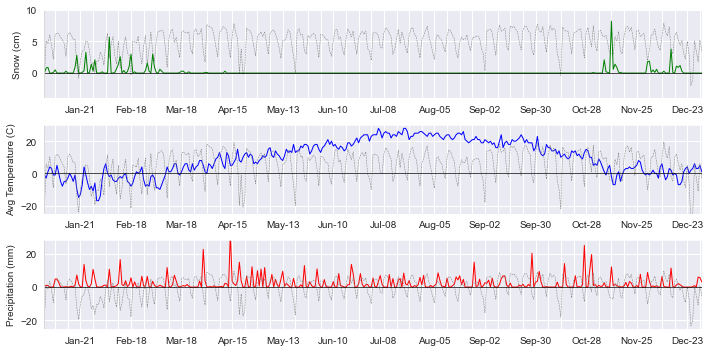

In [144]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(3,1,figsize=(10, 5)) 

sns.lineplot(x='formatted_date',y='count', data=tickets_and_weather,color='#4B0082', lw=1, ax=ax[0])

# ax[0].grid(lw='1', b=True, which='both', axis='both')
# ax[0].xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=4))
# ax[0].xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=MO, interval=1))
# ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(round(x/1000))+'K'))
# ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
# ax[0].set_xlim(['2019-01-01','2019-12-31'])
# ax[0].set_ylim([0,10000])
# ax[0].set_xlabel('')
# ax[0].set_ylabel('No. Tickets')
# ax[0].axhline(linewidth=0.7, color='#000')
# ax[0].axvline(linewidth=0.7, color='#000', x='2019-01-01')
# ax[0].legend(loc='upper right')

mult_snow = 3000
tickets_and_weather['tickets_norm_snow']=(tickets_and_weather['count']/tickets_and_weather['count'].sum()*mult_snow)-(tickets_and_weather['count']/tickets_and_weather['count'].sum()*mult_snow).sum()/len(tickets_and_weather['count'])+5
sns.lineplot(x='formatted_date',y='tickets_norm_snow', data=tickets_and_weather, lw=0.5, ax=ax[0],color="gray", ls="--")
sns.lineplot(x='formatted_date',y='totalSnow_cm', data=tickets_and_weather, lw=1, ax=ax[0],color="green")
plt.grid(lw='1', b=True, which='both', axis='both' )

ax[0].grid(lw='1', b=True, which='both', axis='both')
ax[0].xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=4))
ax[0].xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=MO, interval=1))
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax[0].set_xlim(['2019-01-01','2019-12-31'])
ax[0].set_ylim([-4,10])
ax[0].set_xlabel('')
ax[0].set_ylabel('Snow (cm)')
ax[0].axhline(linewidth=0.7, color='#000')
ax[0].axvline(linewidth=0.7, color='#000', x='2019-01-01')


tickets_and_weather['tickets_norm_avgtempC']=(tickets_and_weather['count']/tickets_and_weather['count'].sum()*15000)-(tickets_and_weather['count']/tickets_and_weather['count'].sum()*15000).sum()/len(tickets_and_weather['count'])+5
sns.lineplot(x='formatted_date',y='avgtempC', data=tickets_and_weather, lw=1, ax=ax[1],color="blue")
sns.lineplot(x='formatted_date',y='tickets_norm_avgtempC', data=tickets_and_weather, lw=0.5, ax=ax[1],color="gray", ls="--")
ax[1].grid(lw='1', b=True, which='both', axis='both')
ax[1].xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=4))
ax[1].xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=MO, interval=1))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax[1].set_xlim(['2019-01-01','2019-12-31'])
ax[1].set_ylim([-25,30])
ax[1].set_xlabel('')
ax[1].set_ylabel('Avg Temperature (C)')
ax[1].axhline(linewidth=0.7, color='#000')
ax[1].axvline(linewidth=0.7, color='#000', x='2019-01-01')



tickets_and_weather['tickets_norm_prec']=(tickets_and_weather['count']/tickets_and_weather['count'].sum()*10000)-(tickets_and_weather['count']/tickets_and_weather['count'].sum()*10000).sum()/len(tickets_and_weather['count'])
sns.lineplot(x='formatted_date',y='precipMM', data=tickets_and_weather, lw=1, ax=ax[2],color="red")
sns.lineplot(x='formatted_date',y='tickets_norm_prec', data=tickets_and_weather, lw=0.5, ax=ax[2],color="gray", ls="--")
ax[2].grid(lw='1', b=True, which='both', axis='both')
ax[2].xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=4))
ax[2].xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=MO, interval=1))
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax[2].set_xlim(['2019-01-01','2019-12-31'])
ax[2].set_ylim([-25,28])
ax[2].set_xlabel('')
ax[2].set_ylabel('Precipitation (mm)')
ax[2].axhline(linewidth=0.7, color='#000')
ax[2].axvline(linewidth=0.7, color='#000', x='2019-01-01')
ax[2].tick_params(which='both', width=2)
# ax[3].tick_params(which='minor', length=20, color='r')
# ax.tick_params(which='major', length=20)
# ax.tick_params(which='minor', length=20, color='r')


# ax.tick_params(which='both', width=2)
# ax.tick_params(which='major', length=20)
# ax.tick_params(which='minor', length=20, color='r')

# plt.axhline(linewidth=1, color='#000')
# plt.axvline(linewidth=1, color='#000', x='2019-01-01')
plt.tight_layout()
plt.show()


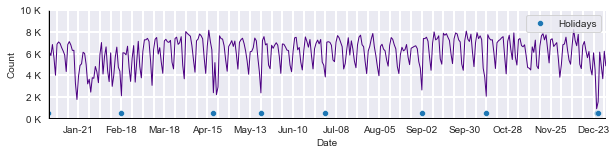

In [142]:
fig, ax = plt.subplots(figsize=(10, 2)) 
sns.lineplot(x='formatted_date',y='count', data=df.groupby('formatted_date').sum(),color='#4B0082', lw=1)
sns.scatterplot(x='formatted_date',y='Holiday', data=tickets_and_weather,ax=ax, label="Holidays")
# plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
plt.grid(lw='2', b=True, which='both', axis='both' )
# tick on mondays every week
# loc = WeekdayLocator()
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=4))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=MO, interval=1))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))

# ax.tick_params(which='both', width=2)
# ax.tick_params(which='major', length=20)
# ax.tick_params(which='minor', length=20, color='r')

ax.set_xlim(['2019-01-01','2019-12-31'])
ax.set_ylim([0,10000])
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(round(x/1000))+' K'))
ax.legend(loc='upper right')


plt.axhline(linewidth=3, color='#000')
plt.axvline(linewidth=4, color='#000', x='2019-01-01')

plt.show()


Text(0, 0.5, 'Fines amount')

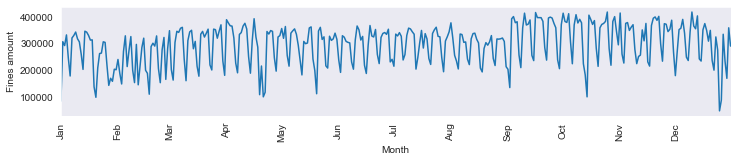

In [138]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(12, 2)) 
sns.lineplot(x='formatted_date',y='set_fine_amount', data=df.groupby('formatted_date').sum())
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)


#set ticks every week
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_xlim(['2019-01-01','2019-12-31'])
ax.set_xlabel('Month')
ax.set_ylabel('Fines amount')

# ax.set_title('title')

In [49]:
aug_sept= df.groupby('formatted_date').sum().loc['2019-8-1':'2019-9-30']
aug_sept

,date_of_infraction,infraction_code,set_fine_amount,time_of_infraction,year,month,day,minute,hour,day_of_week
formatted_date,,,,,,,,,,
2019-08-01,158437215447,700384,378520,8918078.0,15843093,62776,7847,228278,86898,23541
2019-08-02,133622727636,642386,321770,7450739.0,13361742,52944,13236,193939,72568,26472
2019-08-03,117046084991,549312,256675,6546606.0,11704143,46376,17391,169406,63772,28985
2019-08-04,96653378748,423464,235575,5199222.0,9664953,38296,19148,138522,50607,28722
2019-08-05,79935396995,327496,205665,3918254.0,7993221,31672,19795,111254,38070,0
...,...,...,...,...,...,...,...,...,...,...
2019-09-26,146707268316,593981,376625,8824630.0,14670054,65394,188916,214430,86102,21798
2019-09-27,142790235744,608546,360105,8238714.0,14278368,63648,190944,204714,80340,28288
2019-09-28,101802658976,397918,239900,5547564.0,10179798,45378,141176,148964,53986,25210


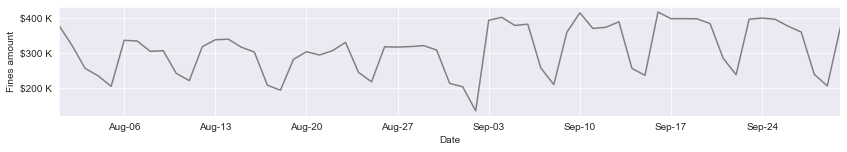

In [50]:
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(14, 2)) 

sns.lineplot(x='formatted_date',y='set_fine_amount', data=aug_sept, color='grey')
# plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '$'+str(round(x/1000))+ ' K'))
ax.set_xlim(['2019-08-01','2019-09-30'])
ax.set_xlabel('Date')
ax.set_ylabel('Fines amount')

plt.show()


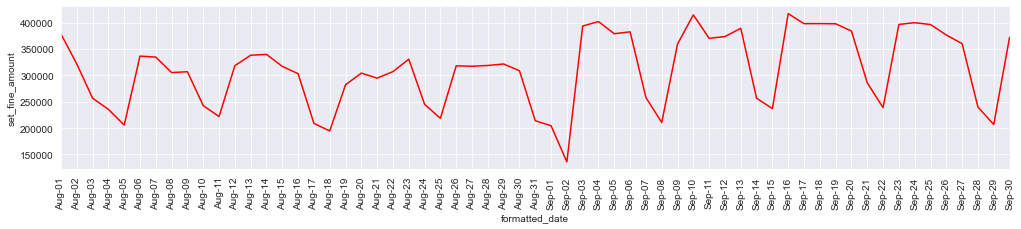

In [51]:
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(17, 3)) 

sns.lineplot(x='formatted_date',y='set_fine_amount', data=aug_sept, color='red')
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
#set ticks every week
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.set_xlim(['2019-08-01','2019-09-30'])

plt.show()

In [122]:
codes = df["infraction_code"].unique()
descriptions = list()
for code in list(codes):
    description = df[df['infraction_code']==code]['infraction_description'].iloc[0]
    descriptions.append(description)

codes_descriptions = pd.DataFrame()
codes_descriptions['codes']=codes
codes_descriptions['descriptions']=descriptions
len(codes_descriptions)


176

In [53]:
for index, row in codes_descriptions.iterrows():
    print(str(row['codes'])+"  ----  "+row['descriptions'])

3  ----  PARK ON PRIVATE PROPERTY
29  ----  PARK PROHIBITED TIME NO PERMIT
5  ----  PARK-SIGNED HWY-PROHIBIT DY/TM
14  ----  PARK-OBSTRUCT (DRWAY/LANEWAY)
9  ----  STOP-SIGNED HWY-PROHIBIT TM/DY
337  ----  PARK - ON BOULEVARD
404  ----  STOP-9 M PEDESTRIAN X BEYOND
406  ----  PARK-VEH. W/O VALID ONT PLATE
15  ----  PARK-WITHIN 3M OF FIRE HYDRANT
384  ----  STOP VEH OTR THN BCYCL-BYCL LN
192  ----  STAND SIGNED TRANSIT STOP
8  ----  STAND VEH.-PROHIBIT TIME/DAY
415  ----  PARK COMMERC LOAD ZONE NOT LDG
414  ----  PARK VEH.-COMMERCIAL LOAD ZONE
30  ----  STOP-(ON/OVER) (SIDEWK/FTPATH)
134  ----  PARK-SIGNED HWY-PUBLIC LANE
355  ----  PARK IN ACCESSIBLE NO PERMIT
28  ----  PARK-N.YORK 2AM-6AM DEC1-MAR31
320  ----  PARK NON-BUS-BUS PK ZNE DY/TM
347  ----  PARK IN A FIRE ROUTE
37  ----  PARK HEAVY (TRUCK/VEH.) TM/DY
2  ----  PARK - LONGER THAN 3 HOURS
16  ----  PARK-WITHIN 9M INTERSECT ROAD
77  ----  PARK-(FRNT/60 CM) DRWAY/LANEWY
336  ----  PARK-FAIL TO DISPLAY PERMIT
419  ----  STAND NON-

In [54]:
df['dummy']=df['infraction_code'].apply(lambda x: 1)
aug_sept_codes= df.groupby('infraction_code',as_index=False).sum().sort_values(ascending=False, by='set_fine_amount')
aug_sept_codes.head(20)

,infraction_code,date_of_infraction,set_fine_amount,time_of_infraction,year,month,day,minute,hour,day_of_week,dummy
4,5,6754876112589,16727650,434994483.0,675464526,2256740,5178589,9739483,4252550,903837,334554
2,3,9182984027345,13643610,448857790.0,918267447,3024430,7114345,13298990,4355588,1284217,454813
151,403,1368040272090,10163310,99169287.0,136799364,455532,1078890,1767087,974022,139420,67756
77,207,5786185385635,8597310,437017831.0,578598963,1912637,4491935,8369831,4286480,833060,286577
24,29,5665611619786,8418150,202032740.0,566541495,1921943,4475486,8358740,1936740,846545,280605
8,9,2135951488142,7800340,142682537.0,213587991,699117,1666442,3116637,1395659,272860,105789
7,8,1390955680187,5047900,87556410.0,139090929,453096,1080587,1988610,855678,186957,68891
154,406,2091205759800,4142930,125621033.0,209113887,655516,1338200,3055433,1225656,295776,103573
124,347,274774836339,3402250,19481777.0,27476571,89124,213939,397777,190840,42476,13609
75,192,392425395708,2915400,28580254.0,39241284,122512,304508,568754,280115,63481,19436


In [55]:
by_code = df.groupby('infraction_code', as_index=False).sum()
by_code = by_code.rename(columns={'dummy':'Count'})

In [196]:
top_codes = pd.merge(left=by_code, right=codes_descriptions, left_on='infraction_code', right_on='codes').sort_values(by='Count', ascending=False)
top_codes['code_category'] = top_codes['descriptions']
top_codes.loc[top_codes['Count']< 110000,'code_category']="Other"
top_codes_summary = top_codes.groupby('code_category', as_index=False).sum().sort_values(ascending=False, by="code_category")

In [197]:
top_codes_summary.loc[top_codes_summary['infraction_code']==5,'code_category']="Parked on highway at prohibited day/time"
top_codes_summary.loc[top_codes_summary['infraction_code']==29,'code_category']="Parking during prohibited time without a permit"
top_codes_summary.loc[top_codes_summary['infraction_code']==3,'code_category']="Parking on private property"
top_codes_summary.loc[top_codes_summary['infraction_code']==207,'code_category']="Parking machine required fee not paid"
top_codes_summary.loc[top_codes_summary['infraction_code']==2,'code_category']="Parking for longer than 3 hours"
top_codes_summary = top_codes_summary.groupby('code_category').sum().sort_values(ascending=False, by="code_category")
top_codes_summary.head(10)


,infraction_code,date_of_infraction,set_fine_amount,time_of_infraction,year,month,day,minute,hour,day_of_week,Count,codes
code_category,,,,,,,,,,,,
Parking on private property,3,9182984027345,13643610,448857790.0,918267447,3024430,7114345,13298990,4355588,1284217,454813,3
Parking machine required fee not paid,207,5786185385635,8597310,437017831.0,578598963,1912637,4491935,8369831,4286480,833060,286577,207
Parking for longer than 3 hours,2,2914968200045,2871660,120119917.0,291487068,952407,2279345,4254317,1158656,424852,144372,2
Parking during prohibited time without a permit,29,5665611619786,8418150,202032740.0,566541495,1921943,4475486,8358740,1936740,846545,280605,29
Parked on highway at prohibited day/time,5,6754876112589,16727650,434994483.0,675464526,2256740,5178589,9739483,4252550,903837,334554,5
Other,37784,14356778912337,58085785,914165977.0,1435630140,4666623,10850037,20665277,8935007,1902452,711060,37784


Text(0, 0.5, '')

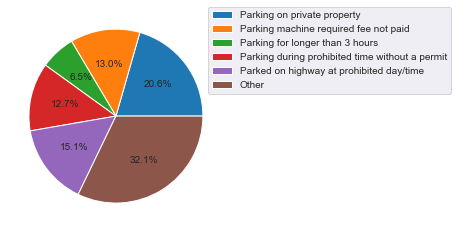

In [199]:
ax= top_codes_summary.plot.pie(y = 'Count',autopct="%.1f%%", figsize=(17,4), labeldistance=None)
plt.legend(bbox_to_anchor=(0.9,1.025), loc="upper left")
ax.set_ylabel('')



In [60]:
top_summary = top_codes.reset_index(drop=False)
sns.lineplot(data = top, x='code_category'

,code_category,infraction_code,date_of_infraction,set_fine_amount,time_of_infraction,year,month,day,minute,hour,day_of_week,Count,codes
0,OTHER,37369,10129621664395,46142515,645862407.0,1012928262,3311990,7845395,14493207,6313692,1333816,501698,37369
1,PARK - LONGER THAN 3 HOURS,2,2914968200045,2871660,120119917.0,291487068,952407,2279345,4254317,1158656,424852,144372,2
2,PARK MACHINE-REQD FEE NOT PAID,207,5786185385635,8597310,437017831.0,578598963,1912637,4491935,8369831,4286480,833060,286577,207
3,PARK ON PRIVATE PROPERTY,3,9182984027345,13643610,448857790.0,918267447,3024430,7114345,13298990,4355588,1284217,454813,3
4,PARK PROHIBITED TIME NO PERMIT,29,5665611619786,8418150,202032740.0,566541495,1921943,4475486,8358740,1936740,846545,280605,29


In [52]:
code_5 = df[df['infraction_code']==5]
code_5.head()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,year,month,day,minute,hour,formatted_date,dummy,day_of_week,day_name
3,***03706,20190101,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,2.0,NR,10 CARABOB CRT,NaN,NaN,ON,2019,1,1,2,0,2019-01-01,1,1,Tuesday
7,***03707,20190101,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,3.0,NR,10 CARABOB CRT,NaN,NaN,ON,2019,1,1,3,0,2019-01-01,1,1,Tuesday
12,***03708,20190101,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,4.0,NR,10 CARABOB CRT,NaN,NaN,ON,2019,1,1,4,0,2019-01-01,1,1,Tuesday
15,***03709,20190101,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,5.0,NR,10 CARABOB CRT,NaN,NaN,ON,2019,1,1,5,0,2019-01-01,1,1,Tuesday
36,***39949,20190101,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,11.0,OPP,7 PARK VISTA,NaN,NaN,ON,2019,1,1,11,0,2019-01-01,1,1,Tuesday


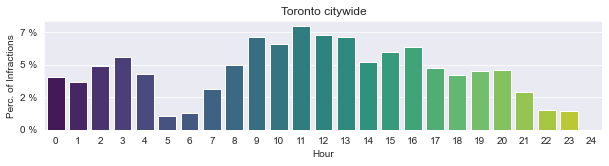

In [208]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(10, 2))
sns.countplot(x='hour', data=df, palette='viridis')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(round((x/2213939)*100))+' %'))
ax.set_title('Toronto citywide')
ax.set_xlabel('Hour')
ax.set_ylabel('Perc. of Infractions')
plt.show()

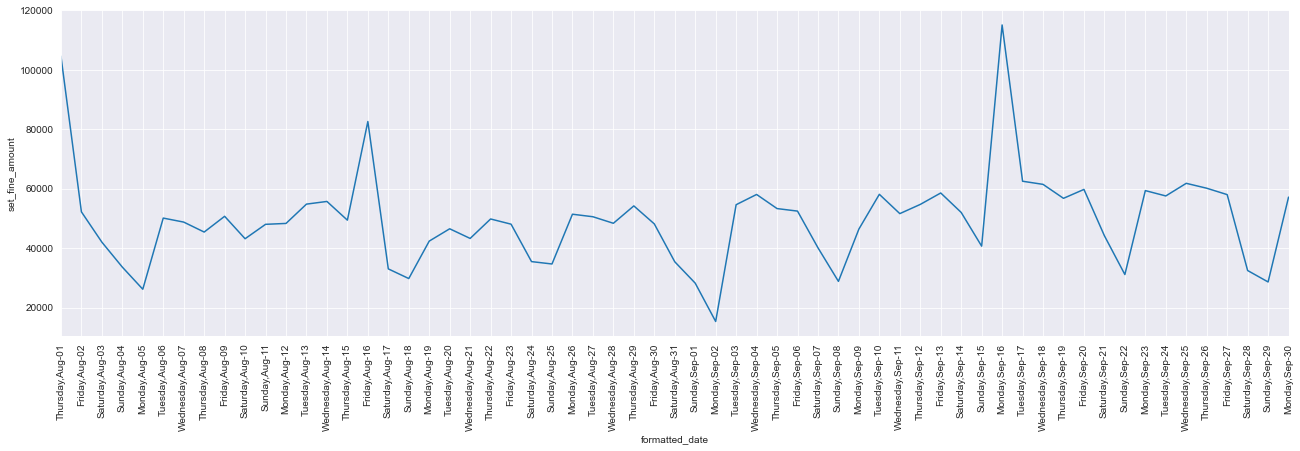

In [53]:
code_5_bydate = code_5.groupby('formatted_date').sum().loc['2019-8-1':'2019-9-30']

sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(22, 6)) 

sns.lineplot(x='formatted_date',y='set_fine_amount', data=code_5_bydate)
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
#set ticks every week
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%A,%b-%d'))
ax.set_xlim(['2019-08-01','2019-09-30'])

plt.show()


In [54]:
top_3 = df[(df['infraction_code']==5) | (df['infraction_code']==3) | (df['infraction_code']==403)]
top_3_delimited = top_3.sort_values(ascending=True, by="formatted_date").set_index("formatted_date").loc['2019-8-28':'2019-9-22']
top_3_delimited


,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,year,month,day,minute,hour,dummy,day_of_week,day_name
formatted_date,,,,,,,,,,,,,,,,,,,
2019-08-28,***12940,20190828,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,1506.0,OPP,154 PEARL ST,NaN,NaN,ON,2019,8,28,6,15,1,2,Wednesday
2019-08-28,***98603,20190828,3,PARK ON PRIVATE PROPERTY,30,1506.0,NaN,4700 KEELE ST,NaN,NaN,ON,2019,8,28,6,15,1,2,Wednesday
2019-08-28,***17315,20190828,403,STOP-SIGNED HIGHWAY-RUSH HOUR,150,1506.0,NR,437 QUEEN ST W,NaN,NaN,ON,2019,8,28,6,15,1,2,Wednesday
2019-08-28,***16999,20190828,403,STOP-SIGNED HIGHWAY-RUSH HOUR,150,1506.0,NR,842 KING ST W,NaN,NaN,ON,2019,8,28,6,15,1,2,Wednesday
2019-08-28,***92160,20190828,403,STOP-SIGNED HIGHWAY-RUSH HOUR,150,1507.0,NR,33 COLLEGE ST,NaN,NaN,ON,2019,8,28,7,15,1,2,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-22,***35030,20190922,3,PARK ON PRIVATE PROPERTY,30,813.0,NaN,15 TOBERMORY DR,NaN,NaN,ON,2019,9,22,13,8,1,6,Sunday
2019-09-22,***02393,20190922,3,PARK ON PRIVATE PROPERTY,30,815.0,NaN,101 HUMBER BLVD,NaN,NaN,ON,2019,9,22,15,8,1,6,Sunday
2019-09-22,***02394,20190922,3,PARK ON PRIVATE PROPERTY,30,815.0,NaN,101 HUMBER BLVD,NaN,NaN,ON,2019,9,22,15,8,1,6,Sunday


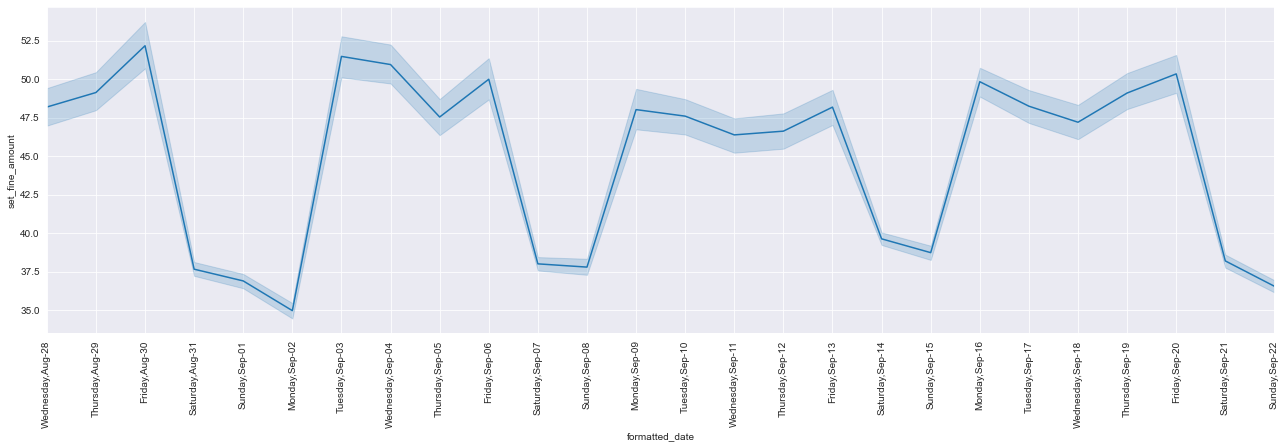

In [55]:
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(22, 6)) 

sns.lineplot(x='formatted_date',y='set_fine_amount', data=top_3_delimited)
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)
#set ticks every week
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%A,%b-%d'))
ax.set_xlim(['2019-08-28','2019-09-22'])

plt.show()

Most infractions on Mondays and Tuesdays are of code 5: PARK-SIGNED HWY-PROHIBIT DY/TM and 3: PARK ON PRIVATE PROPERTY

In [56]:
df[df['formatted_date']=='2019-09-16']['infraction_code'].value_counts().head()

5      2302
3      1494
207     890
29      694
2       483
Name: infraction_code, dtype: int64

The least number of infractios is often on sSundays. Most of these infractions have code 3: PARK ON PRIVATE PROPERTY and 207: PARK MACHINE-REQD FEE NOT PAID  

In [57]:
df[df['formatted_date']=='2019-09-15']['infraction_code'].value_counts().head(20)

3      1050
207     864
5       813
29      791
2       412
406     204
9       153
8       145
6       115
15       76
192      47
90       43
347      39
415      23
336      20
30       19
16       18
134      17
48       16
419      15
Name: infraction_code, dtype: int64

In [58]:
by_dayofweek = df.groupby('day_of_week').sum().sort_values(by="day_of_week", ascending=True)
by_dayofweek


,date_of_infraction,infraction_code,set_fine_amount,time_of_infraction,year,month,day,minute,hour,dummy
day_of_week,,,,,,,,,,
0,6319826825468,29273981,15693240,364548754.0,631961133,2106121,4883368,9114354,3554344,313007
1,7288535494318,33186469,17913870,419806870.0,728828715,2427751,5569218,10584670,4092222,360985
2,6997602242608,31417420,17090840,403116077.0,699736944,2274744,5328208,10173877,3929422,346576
3,6932062087051,31814038,17122110,409118278.0,693183270,2239854,5401651,10066978,3990513,343330
4,7098962351326,32717780,17738215,411798976.0,709872324,2336798,5431526,10314876,4014841,351596
5,5541736262158,24488754,12416560,305268992.0,554154930,1826391,4323058,7998692,2972703,274470
6,4482678994808,18234972,10369330,243530791.0,448252323,1523121,3452708,6433191,2370976,222017


# Number of infractions per day of week all year

<AxesSubplot:ylabel='dummy'>

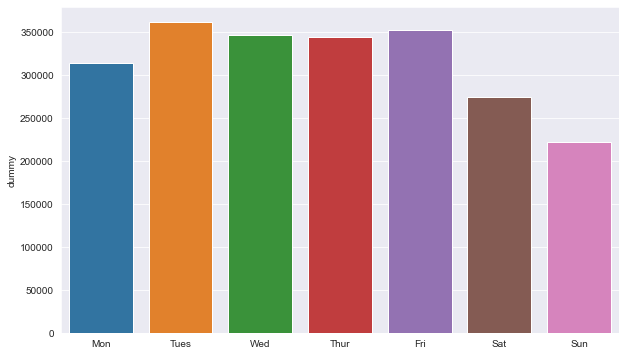

In [59]:
plt.figure(figsize=(10,6))
daysofweek = ['Mon','Tues','Wed','Thur','Fri','Sat','Sun']
sns.barplot(x=daysofweek, y="dummy", data=by_dayofweek)

# Fine amount charged per day of week all year

<AxesSubplot:ylabel='set_fine_amount'>

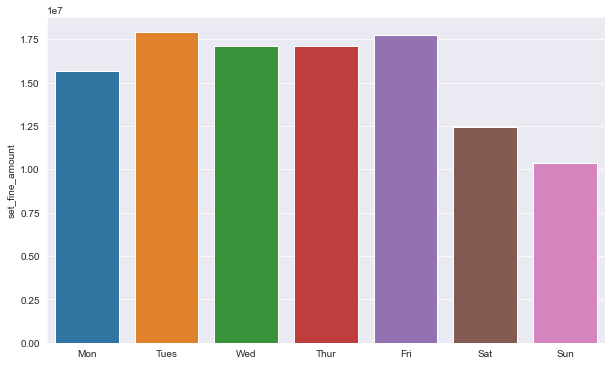

In [60]:
plt.figure(figsize=(10,6))
daysofweek = ['Mon','Tues','Wed','Thur','Fri','Sat','Sun']
sns.barplot(x=daysofweek, y="set_fine_amount", data=by_dayofweek)

In [61]:

df.head()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,year,month,day,minute,hour,formatted_date,dummy,day_of_week,day_name
0,***29025,20190101,3,PARK ON PRIVATE PROPERTY,30,0.0,AT,2110 KEELE ST,NaN,NaN,ON,2019,1,1,0,0,2019-01-01,1,1,Tuesday
1,***32896,20190101,3,PARK ON PRIVATE PROPERTY,30,1.0,AT,125 QUEENS WHARF RD,NaN,NaN,ON,2019,1,1,1,0,2019-01-01,1,1,Tuesday
2,***41781,20190101,29,PARK PROHIBITED TIME NO PERMIT,30,1.0,S/O,HAZELWOOD AVE,W/O,JONES AVE,ON,2019,1,1,1,0,2019-01-01,1,1,Tuesday
3,***03706,20190101,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,2.0,NR,10 CARABOB CRT,NaN,NaN,ON,2019,1,1,2,0,2019-01-01,1,1,Tuesday
4,***69805,20190101,14,PARK-OBSTRUCT (DRWAY/LANEWAY),50,3.0,R/O,1801 EGLINTON AVE W,NaN,NaN,ON,2019,1,1,3,0,2019-01-01,1,1,Tuesday


In [62]:
df.groupby('hour').sum()

,date_of_infraction,infraction_code,set_fine_amount,time_of_infraction,year,month,day,minute,dummy,day_of_week
hour,,,,,,,,,,
0,1652628173738,4610890,3254645,2427435.0,165257169,551891,1294638,2427435,81851,273594
1,1497483100454,3799477,2847130,9531289.0,149743173,502088,1161654,2114589,74167,237063
2,1973195394659,3244286,3607560,22486101.0,197312832,655526,1522059,2940501,97728,301452
3,2250979164964,2600475,3391380,36739201.0,225090234,750649,1760064,3293401,111486,335714
4,1738437856107,2047679,2472870,36661739.0,173837919,573185,1347607,2221339,86101,266330
5,414877601505,407962,604710,10688175.0,41486412,131600,321505,414175,20548,66196
6,513651208604,1533434,956400,16352267.0,51363360,172109,397704,1088267,25440,71004
7,1257011678877,7350028,3763145,45452140.0,125696883,418876,961277,1872240,62257,163696
8,2013597004790,10399386,4564570,82753982.0,201352851,669366,1558190,2970782,99729,270992


In [64]:
addresses = df['location2']
addresses

0                2110 KEELE ST
1          125 QUEENS WHARF RD
2                HAZELWOOD AVE
3               10 CARABOB CRT
4          1801 EGLINTON AVE W
                  ...         
2213933           4700 JANE ST
2213934    61 BISHOP TUTU BLVD
2213935         735 COLLEGE ST
2213936    61 BISHOP TUTU BLVD
2213937     320 ASSINIBOINE RD
Name: location2, Length: 2211981, dtype: object

In [65]:
get_street_name(address):
    address = str(address)
    valid_char=""
    address.find()
    for char in address:
        if char.isdigit():
            x=1
            valid_char += char




SyntaxError: invalid syntax (<ipython-input-65-b885cd824e54>, line 1)

NameError: name 'randi' is not defined